## Predicting Car Prices Using K-Nearest Neighbor Algorithms

In this project, the goal is be able to predict car prices using different K-Nearest Neighbor Algorithm models on various attributes like car horsepower, mpg, and curb weight. The dataset is from 1985's Ward's Automotive Yearbook on Import Car and Truck Specifications. The full documentation can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile).


In [1]:
import pandas as pd
import numpy as np
# dataset didn't have column names, but documentation had them
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df = pd.read_csv('imports-85.data',names=cols)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
# replace '?' with NaN Values
df = df.replace('?',np.NaN)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df['num-of-doors'].value_counts()
# change number of doors from word to num
df['num-of-doors'] = df['num-of-doors'].replace('two',2)
df['num-of-doors'] = df['num-of-doors'].replace('four',4)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Only concerned with numeric columns 
continuous_values_cols = ['normalized-losses', 'num-of-doors','wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = df[continuous_values_cols]

In [5]:
numeric_cars.head()

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,2.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,2.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,2.0,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,4.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,4.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# convert all columns to float data type
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
num-of-doors          2
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
# fill in missing values with mean for every column except num of doors which just filled in with 2
numeric_cars['num-of-doors'] = numeric_cars['num-of-doors'].fillna(2)
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.head()

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,2.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,2.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,2.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,4.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,4.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [8]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.head()

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,1.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,1.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col,target_col,df):
    #instansiate Regressor
    knn = KNeighborsRegressor()
    
    #randomize order of rows
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #split the data in half
    last_train_row = int(len(rand_df)/2)
    
    #select the first half as training and second half as test
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # fit the knn model using default k value
    knn.fit(train_df[[train_col]],train_df[target_col])
    
    #predict
    predictions = knn.predict(test_df[[train_col]])
    #use mean_squared_error and np.sqrt function to calculate rmse
    mse = mean_squared_error(test_df[target_col],predictions)
    rmse = np.sqrt(mse)
    return round(rmse,2) #return rounded rmse
    
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    
    rmse_results[col] = knn_train_test(col,'price',numeric_cars)

# create series object
rmse_results_series = pd.Series(rmse_results)
# sort values
rmse_results_series.sort_values()

highway-mpg          4245.73
curb-weight          4436.52
width                5030.14
city-mpg             5085.05
horsepower           5092.27
length               5418.78
wheel-base           5743.88
bore                 6746.03
compression-rate     7177.20
normalized-losses    7374.51
height               7832.15
peak-rpm             7965.54
stroke               8096.65
num-of-doors         8632.30
dtype: float64

In [10]:
def knn_train_test(train_col,target_col,df):
    
    #randomize order of rows
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #split the data in half
    last_train_row = int(len(rand_df)/2)
    
    #select the first half as training and second half as test
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        #instansiate Regressor with different k values
        knn = KNeighborsRegressor(n_neighbors=k)
        # fit the knn model 
        knn.fit(train_df[[train_col]],train_df[target_col])
    
    
        #predict
        predictions = knn.predict(test_df[[train_col]])
        
        #use mean_squared_error and np.sqrt function to calculate rmse
        mse = mean_squared_error(test_df[target_col],predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = round(rmse,2)
    return k_rmses
rmse_with_k = {}
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_with_k[col] = knn_train_test(col,'price',numeric_cars)
rmse_with_k
    



{'normalized-losses': {1: 6998.74,
  3: 7038.21,
  5: 7374.51,
  7: 7722.67,
  9: 7507.51},
 'num-of-doors': {1: 9304.2, 3: 9424.0, 5: 8632.3, 7: 8472.37, 9: 8443.63},
 'wheel-base': {1: 5400.51, 3: 5629.54, 5: 5743.88, 7: 6048.74, 9: 6360.53},
 'length': {1: 6853.72, 3: 5113.21, 5: 5418.78, 7: 5618.15, 9: 5641.43},
 'width': {1: 5739.25, 3: 5291.95, 5: 5030.14, 7: 4933.64, 9: 4951.83},
 'height': {1: 10653.05, 3: 8176.93, 5: 7832.15, 7: 7743.87, 9: 7632.67},
 'curb-weight': {1: 5842.17, 3: 4527.85, 5: 4436.52, 7: 4320.06, 9: 4181.09},
 'bore': {1: 7930.55, 3: 6353.89, 5: 6746.03, 7: 7246.71, 9: 7184.42},
 'stroke': {1: 7345.45, 3: 7455.21, 5: 8096.65, 7: 7935.19, 9: 8066.59},
 'compression-rate': {1: 7255.77,
  3: 7485.23,
  5: 7177.2,
  7: 7333.97,
  9: 7426.77},
 'horsepower': {1: 5261.09, 3: 4995.3, 5: 5092.27, 7: 5025.31, 9: 4989.99},
 'peak-rpm': {1: 9386.46, 3: 8096.11, 5: 7965.54, 7: 8256.81, 9: 8101.58},
 'city-mpg': {1: 6449.85, 3: 4808.84, 5: 5085.05, 7: 4958.16, 9: 5021.79}

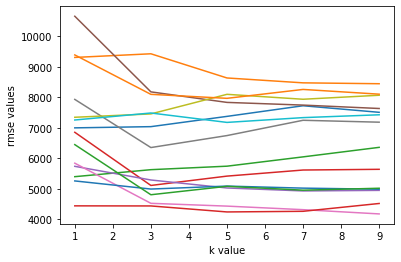

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in rmse_with_k.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label=k)
    plt.xlabel('k value')
    plt.ylabel('rmse values')


In [12]:
feature_avg_rmse = {}
for k,v in rmse_with_k.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

highway-mpg          4384.388
curb-weight          4661.538
horsepower           5072.792
width                5189.362
city-mpg             5264.738
length               5729.058
wheel-base           5836.640
bore                 7092.320
normalized-losses    7328.328
compression-rate     7335.788
stroke               7779.818
peak-rpm             8361.300
height               8407.734
num-of-doors         8855.300
dtype: float64

In [13]:
# multivariate model with default k neigbors(5)
def knn_train_test_n_columns(training_cols, target, df):
    #randomize order of rows
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #create train/test set
    last_train_row =  int(len(rand_df)/2)
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    #instantiate 
    knn = KNeighborsRegressor()
    
    knn.fit(train_df[training_cols],train_df[target])
    
    #predict
    predictions = knn.predict(test_df[training_cols])
    
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_df[target],predictions))
    return rmse

top_features = {}
#knn Regressor for top 2 features from previous steps
two_best_features = ['highway-mpg','curb-weight']
rmse_val = knn_train_test_n_columns(two_best_features,'price',numeric_cars)    
top_features['two_best'] = rmse_val

#knn Regressor for top 3 features from previous steps
three_best = ['highway-mpg','curb-weight','horsepower']
rmse_val = knn_train_test_n_columns(three_best,'price',numeric_cars) 
top_features['three_best'] = rmse_val

#knn Regressor for top 4 features from previous steps
four_best = ['highway-mpg','curb-weight','horsepower','width']
rmse_val = knn_train_test_n_columns(four_best,'price',numeric_cars) 
top_features['four_best'] = rmse_val

#knn Regressor for top 3 features from previous steps
five_best = ['highway-mpg','curb-weight','horsepower','width','city-mpg']
rmse_val = knn_train_test_n_columns(five_best,'price',numeric_cars) 
top_features['five_best'] = rmse_val
top_features

{'two_best': 3820.2253486903005,
 'three_best': 3864.7143872599117,
 'four_best': 4258.304607896109,
 'five_best': 4053.975733555753}

In [14]:
# multivariate model with k neighbors in range 1-25
def knn_train_test_n_columns(training_cols, target, df):
    #randomize order of rows
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #create train/test set
    last_train_row =  int(len(rand_df)/2)
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    rmse_k = {}
    k_values = [i for i in range(1,25)]
    #instantiate
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)

        knn.fit(train_df[training_cols],train_df[target])

        #predict
        predictions = knn.predict(test_df[training_cols])

        #RMSE
        rmse = np.sqrt(mean_squared_error(test_df[target],predictions))
        rmse_k[k] = rmse
    return rmse_k

top_features = {}
#knn Regressor for top 2 features from previous steps
two_best_features = ['highway-mpg','curb-weight']
rmse_val = knn_train_test_n_columns(two_best_features,'price',numeric_cars)    
top_features['two_best'] = rmse_val

#knn Regressor for top 3 features from previous steps
three_best = ['highway-mpg','curb-weight','horsepower']
rmse_val = knn_train_test_n_columns(three_best,'price',numeric_cars) 
top_features['three_best'] = rmse_val

#knn Regressor for top 4 features from previous steps
four_best = ['highway-mpg','curb-weight','horsepower','width']
rmse_val = knn_train_test_n_columns(four_best,'price',numeric_cars) 
top_features['four_best'] = rmse_val

#knn Regressor for top 3 features from previous steps
five_best = ['highway-mpg','curb-weight','horsepower','width','city-mpg']
rmse_val = knn_train_test_n_columns(five_best,'price',numeric_cars) 
top_features['five_best'] = rmse_val
top_features

{'two_best': {1: 4469.809924247531,
  2: 4150.696507458633,
  3: 3987.9891626272856,
  4: 3954.5066251774333,
  5: 3820.2253486903005,
  6: 3802.877218136884,
  7: 3825.1326072315655,
  8: 3815.9297349059752,
  9: 3923.7159927651383,
  10: 4114.50348106246,
  11: 4221.6225114338,
  12: 4326.151866605607,
  13: 4442.775308741222,
  14: 4540.333391812839,
  15: 4599.611325323972,
  16: 4697.432994259506,
  17: 4701.926516916978,
  18: 4730.548039363689,
  19: 4772.357905165295,
  20: 4809.441994104417,
  21: 4869.813896352592,
  22: 4903.675608120018,
  23: 4951.892898462238,
  24: 5023.0541108693815},
 'three_best': {1: 3303.1649482779635,
  2: 3320.925401736297,
  3: 3632.4569157445903,
  4: 3876.0801339981654,
  5: 3864.7143872599117,
  6: 3948.098176356009,
  7: 4106.1430994654975,
  8: 4183.999203968715,
  9: 4367.356336808875,
  10: 4440.305746784329,
  11: 4502.767249353329,
  12: 4429.480367369066,
  13: 4521.535772210169,
  14: 4518.365590629176,
  15: 4580.6593348484685,
  16: 

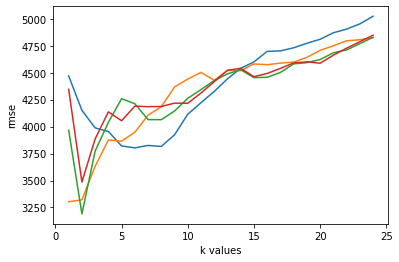

In [15]:
for k,v in top_features.items():
    x=list(v.keys())
    y=list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k values')
    plt.ylabel('rmse')